<center>
 <img src="https://i.imgur.com/mpnUW7E.jpg", height='297', width='821'>
</center>

***

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates

from io import StringIO
import pandas as pd
import numpy as np
import git

import seaborn as sns
sns.set()


### **set location of cloned repository**

In [2]:
local_repo_path = r'C:\@Development\polkadot'

### **initialize the use of git commands via python**

In [3]:
repository = git.Repo(local_repo_path)
gitbin = repository.git
gitlog = gitbin.execute('git log --numstat --pretty=format:"\t\t\t%h\t%at\t%aN\t%ae"')

### **prepare data as CSV**

In [4]:
commits_rawdata = pd.read_csv(
                    StringIO(gitlog), 
                    sep="\t",
                    header=None,              
                    names=['additions', 'deletions', 'filename', 'sha', 'timestamp', 'author', 'email']
                  )

### **cleanup & set columns to appropriate data type**

In [5]:
commits = commits_rawdata.fillna(method='ffill').dropna()
commits['filetype'] = commits['filename'].str.split(pat='.', expand=True)[1]
commits['additions'] = pd.to_numeric(commits['additions'], errors='coerce', downcast='integer')
commits['deletions'] = pd.to_numeric(commits['deletions'], errors='coerce', downcast='integer')
commits['timestamp'] = pd.to_datetime(commits['timestamp'], unit="s")

***

***

### **top users by username/e-mail**

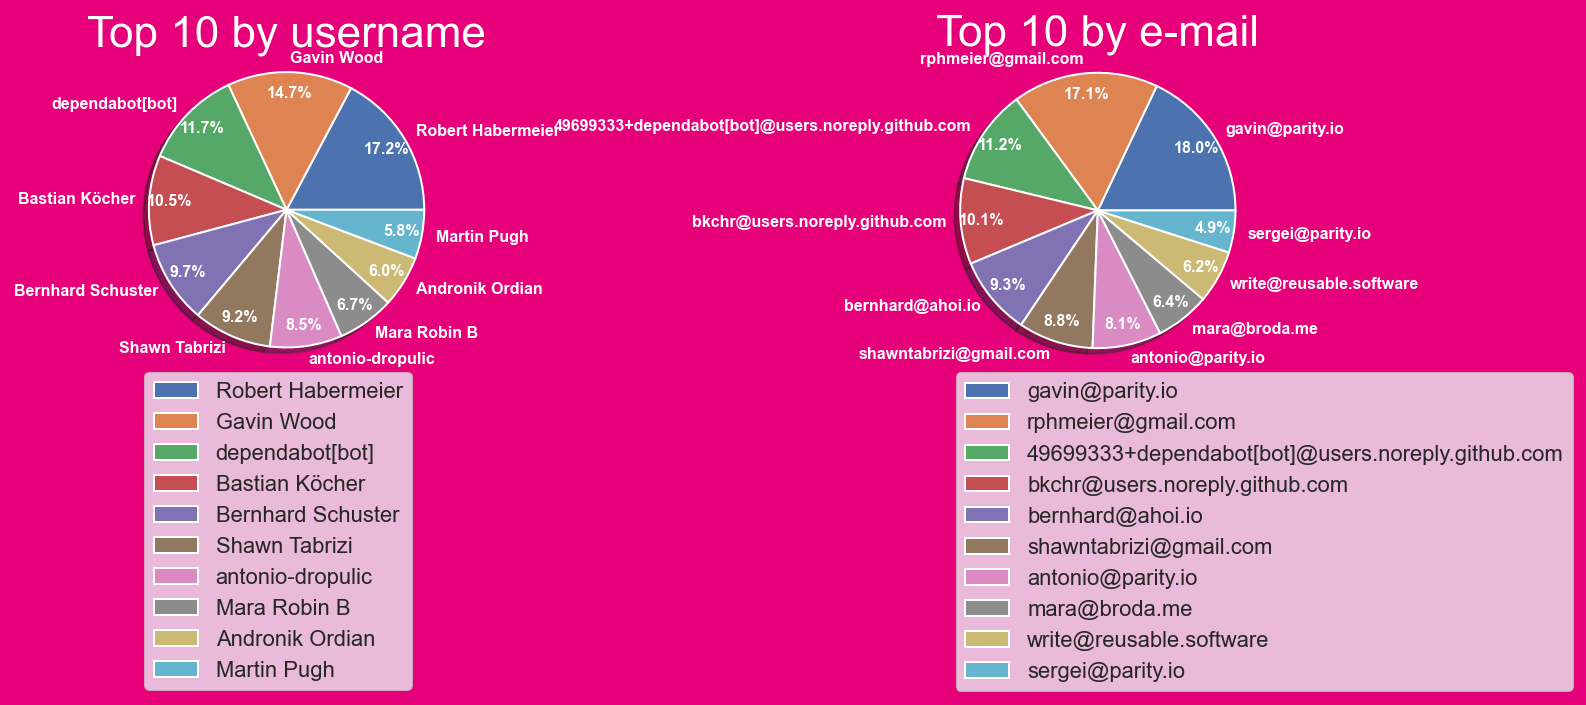

In [6]:
top10_interactions = commits.groupby(['author', 'email']).size().reset_index(name='interactions').sort_values(by=['interactions'], ascending=False).drop(columns=['email']).set_index('author').head(10)

fig = plt.figure(figsize=(10,8),dpi=144, tight_layout=True, facecolor='#E6007A')

# Top 10 users by username
ax = fig.add_subplot(121)
cts = commits.groupby(['author']).size().reset_index(name='interactions').sort_values(by=['interactions'], ascending=False).head(10)

ax.pie(cts.interactions, labels=cts.author, autopct='%1.1f%%', shadow=True, startangle=0, textprops={'color':'white', 'weight':'bold', 'fontsize':8}, pctdistance=0.85, frame=True)
ax.axis('off')
ax.set_title("Top 10 by username", fontsize=22, color="white")
ax.legend(cts.author, loc='upper left', bbox_to_anchor=(0, 0));


# Top 10 users by email
ax = fig.add_subplot(122)
cts = commits.groupby(['email']).size().reset_index(name='interactions').sort_values(by=['interactions'], ascending=False).head(10)

ax.pie(cts.interactions, labels=cts.email, autopct='%1.1f%%', shadow=True, startangle=0, textprops={'color':'white', 'weight':'bold', 'fontsize':8}, pctdistance=0.85, frame=True)
ax.axis('off')
ax.set_title("Top 10 by e-mail", fontsize=22, color="white")
ax.legend(cts.email, loc='upper left', bbox_to_anchor=(0, 0));

***

### **commonly used filetypes**

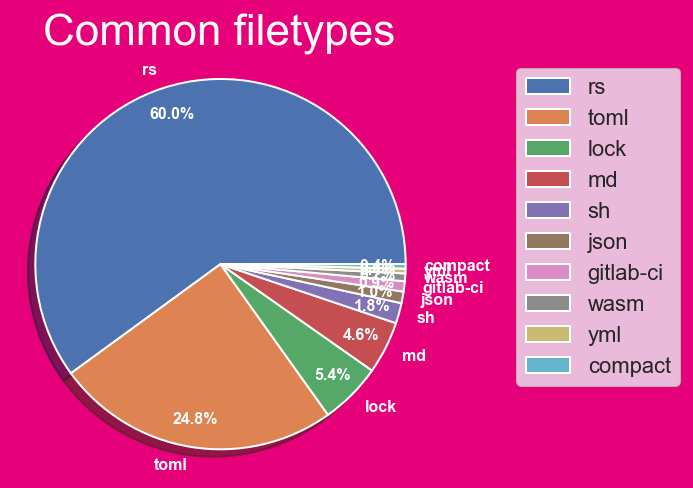

In [7]:
fig = plt.figure(figsize=(8,8),dpi=144, tight_layout=True, facecolor='#E6007A')

ax = fig.add_subplot(121)
cts = commits.groupby(['filetype']).size().reset_index(name='interactions').sort_values(by=['interactions'], ascending=False).head(10)

ax.pie(cts.interactions, labels=cts.filetype, autopct='%1.1f%%', shadow=True, startangle=0, textprops={'color':'white', 'weight':'bold', 'fontsize':8}, pctdistance=0.85, frame=True)
ax.axis('off')
ax.set_title("Common filetypes", fontsize=22, color="white")
ax.legend(cts.filetype, loc='upper left', bbox_to_anchor=(1.2, 1));


***

### **git activity**

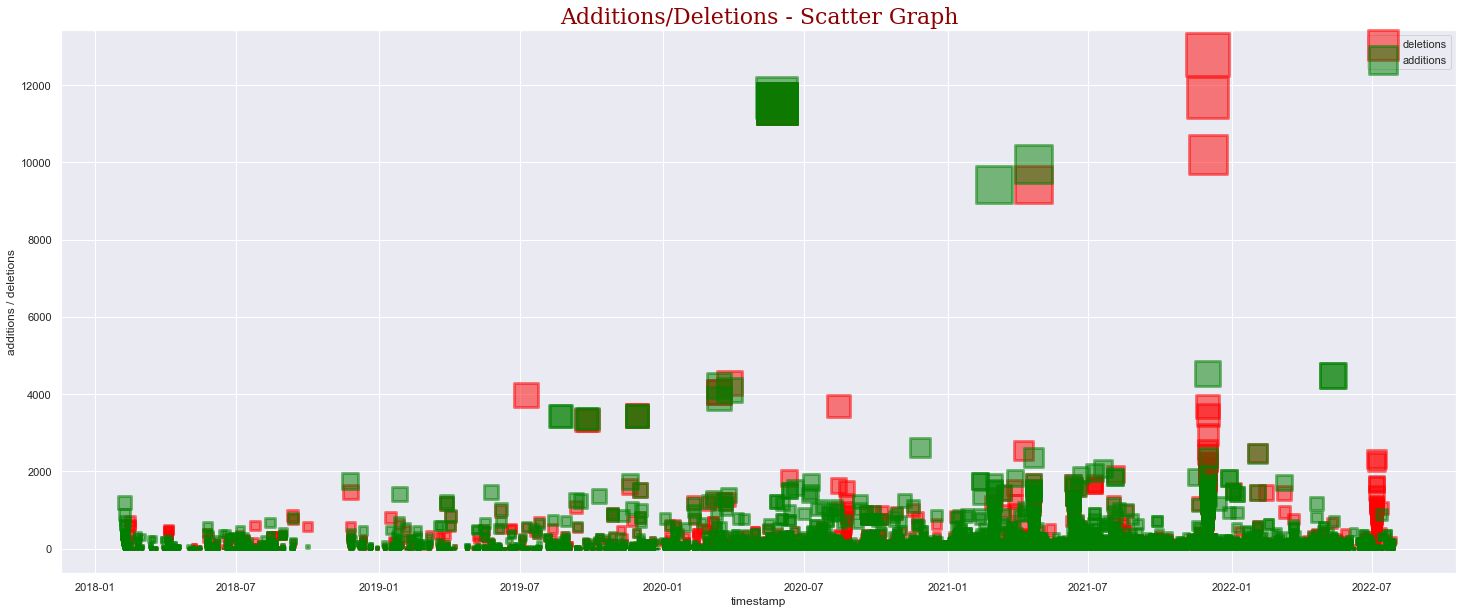

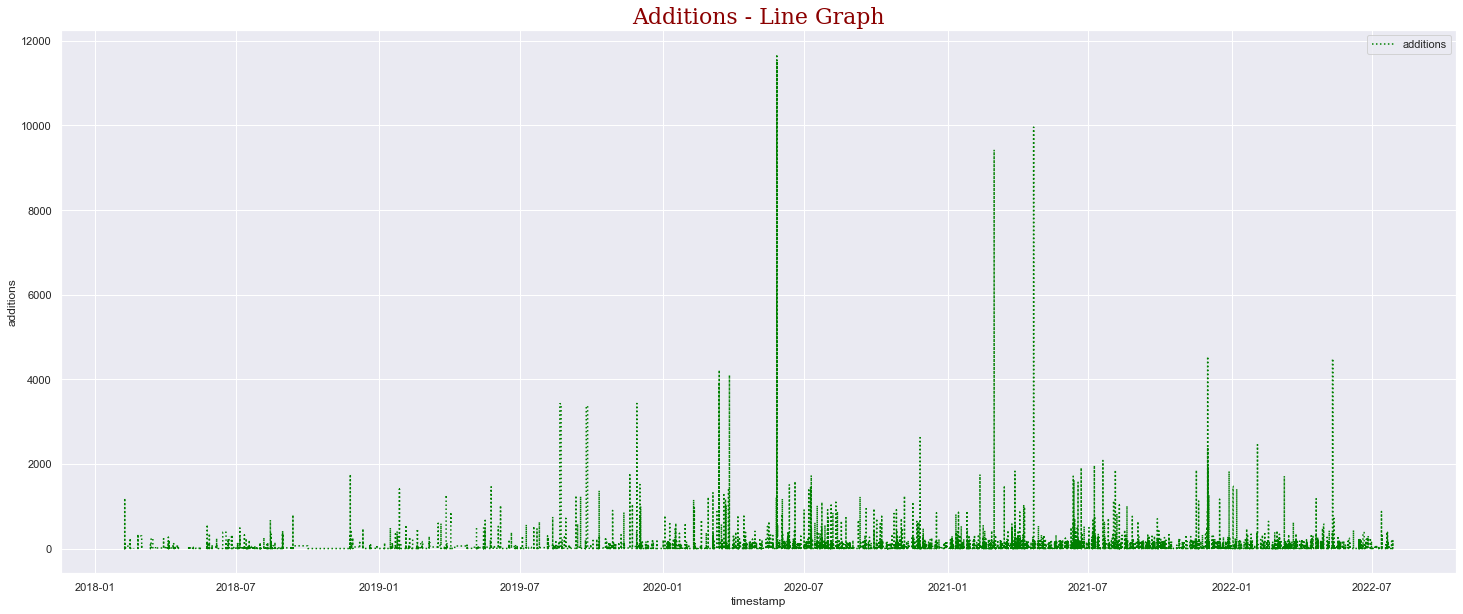

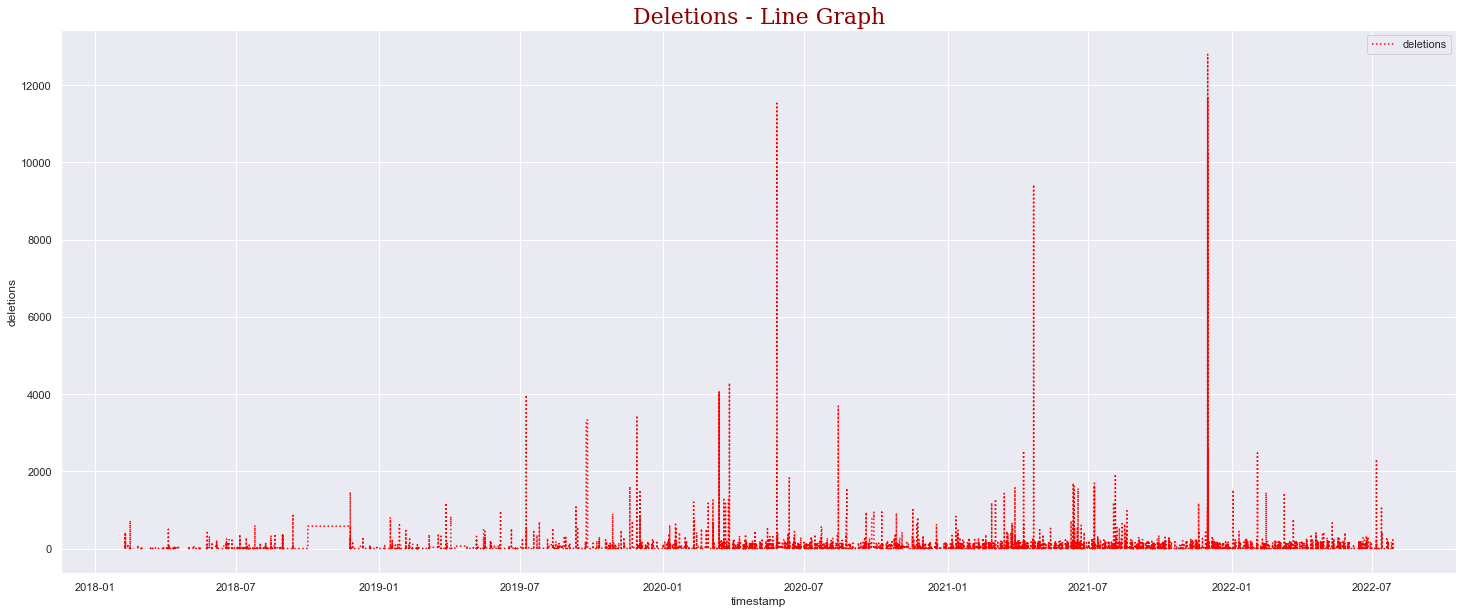

In [10]:
# scatter graph - additions / deletions
%matplotlib inline
plt.figure(figsize=(25, 10))
plt.title('Additions/Deletions - Scatter Graph', fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 22})
plt.scatter(commits.timestamp, commits.deletions, marker=',', color="red", alpha=0.5, label='deletions', s=commits.deletions/7, linewidths=3)
plt.scatter(commits.timestamp, commits.additions, marker=',', color="green", alpha=0.5, label='additions', s=commits.additions/7, linewidths=3)
plt.xlabel('timestamp')
plt.ylabel('additions / deletions')
plt.legend()
plt.show();


# line graph - additions
plt.figure(figsize=(25, 10))
plt.title('Additions - Line Graph', fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 22})


plt.plot(commits.timestamp, commits.additions, color='green', linestyle=':')



plt.xlabel('timestamp')
plt.ylabel('additions')
plt.legend(['additions'])
plt.show();


# line graph - deletions
plt.figure(figsize=(25, 10))
plt.title('Deletions - Line Graph', fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 22})
plt.plot(commits.timestamp, commits.deletions, color='red', linestyle=':')
plt.xlabel('timestamp')
plt.ylabel('deletions')
plt.legend(['deletions'])
plt.show();

In [26]:


import numpy as np

from ipycanvas import Canvas
%matplotlib widget
n_particles = 50000

x = np.array(np.random.rayleigh(250, n_particles), dtype=np.int32)
y = np.array(np.random.rayleigh(250, n_particles), dtype=np.int32)
size = np.random.randint(1, 5, n_particles)

canvas = Canvas(width=800, height=500)
canvas.fill_style = "pink"
canvas.fill_rects(x, y, size)
canvas

Canvas(width=800)